<a href="https://colab.research.google.com/github/upen1530/Assignment1_ur0072.ipynb/blob/main/Assignment_5__(ur0072).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: Sampling and Distributions – Movies & Happiness Data

In this assignment, we will explore sampling and distribution concepts using two real-world datasets:

1. **Movies Dataset** – includes worldwide revenue, ratings, and genre information.
2. **World Happiness Report** – includes happiness score, GDP, social support, and life expectancy data by country.

We will practice different sampling techniques, simulate distributions, and analyze the impact of sample size and randomness.


In [32]:
!pip3 install datascience
!pip3 install numpy
!pip3 install matplotlib

In [25]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *
# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

We will use the following two datasets:

- `movies.csv` – Contains data on movies, revenue, and ratings.
- `happiness.csv` – Contains global happiness and economic indicators.

Please make sure these files are in the same directory as this notebook.


### Question 1: Data Exploration & Summary Statistics

Load both datasets and display the top 5 rows. Then, calculate and compare the mean and standard deviation of:

- Movie revenues by genre
- Happiness score by region

What trends or disparities do you observe?


# New Section

In [28]:
import numpy as np
from datascience import *

# Load datasets
df_movies = Table.read_table('/content/sample_data/movies copy.csv')
df_happiness = Table.read_table('/content/happiness copy.csv')

# Display first 5 rows
print("Movies Dataset:")
df_movies.show(5)

print("\nHappiness Dataset:")
df_happiness.show(5)

# Calculate mean and standard deviation of movie revenues by genre
print("\nMovie Revenues by Genre (Mean):")
display(df_movies.group('genre', np.mean).select('genre', 'revenue_millions mean'))

print("\nMovie Revenues by Genre (Std Dev):")
display(df_movies.group('genre', np.std).select('genre', 'revenue_millions std'))

# Calculate mean and standard deviation of happiness score by region
print("\nHappiness Score by Region (Mean):")
display(df_happiness.group('region', np.mean).select('region', 'happiness_score mean'))

print("\nHappiness Score by Region (Std Dev):")
display(df_happiness.group('region', np.std).select('region', 'happiness_score std'))

Movies Dataset:


title,genre,revenue_millions,rating
Movie A,Action,150,7.8
Movie B,Comedy,85,6.5
Movie C,Drama,45,8.1
Movie D,Horror,30,5.9
Movie E,Sci-Fi,120,7.2



Happiness Dataset:


country,region,happiness_score,gdp_per_capita,social_support,life_expectancy
Country A,Western Europe,7.5,1.4,0.9,78
Country B,Sub-Saharan Africa,4.2,0.5,0.4,62
Country C,Western Europe,6.9,1.3,0.8,80
Country D,Sub-Saharan Africa,3.8,0.4,0.3,60
Country E,South Asia,5.4,0.9,0.7,70



Movie Revenues by Genre (Mean):


genre,revenue_millions mean
Action,150
Comedy,85
Drama,45
Horror,30
Sci-Fi,120



Movie Revenues by Genre (Std Dev):


genre,revenue_millions std
Action,0
Comedy,0
Drama,0
Horror,0
Sci-Fi,0



Happiness Score by Region (Mean):


region,happiness_score mean
South Asia,5.4
Sub-Saharan Africa,4
Western Europe,7.2



Happiness Score by Region (Std Dev):


region,happiness_score std
South Asia,0
Sub-Saharan Africa,0.2
Western Europe,0.3


In [ ]:
### Interpretation

#Action movies have the highest revenue (150M), followed by Sci-Fi (120M), while Drama and Horror generate much lower revenue, showing a clear profitability gap between genres.

#Western Europe has the highest average happiness score (7.2), while Sub-Saharan Africa has the lowest (4.0), indicating strong regional differences in well-being.

#Several groups show a standard deviation of 0, meaning there is only one sample per genre or region, so internal variability cannot be assessed.

#The data suggests wealthier regions tend to be happier, just as commercial movie genres earn more, but this conclusion is limited by small group sizes.

#More data is needed to make reliable generalizations because limited observations prevent meaningful statistical comparison beyond simple averages.

### Question 2: Random Sampling

From the happiness dataset, draw two random samples (size = 20) and compute the sample mean of GDP for each. Repeat the sampling process 5 times and store the means.

Plot the sampling distribution of these means. How consistent are they?



Sample Means Across 5 Iterations:


,Sample Mean GDP
0,0.815
1,0.995
2,0.920
3,0.825
4,0.995
5,0.970
6,1.050
7,0.830
8,0.865
9,1.025


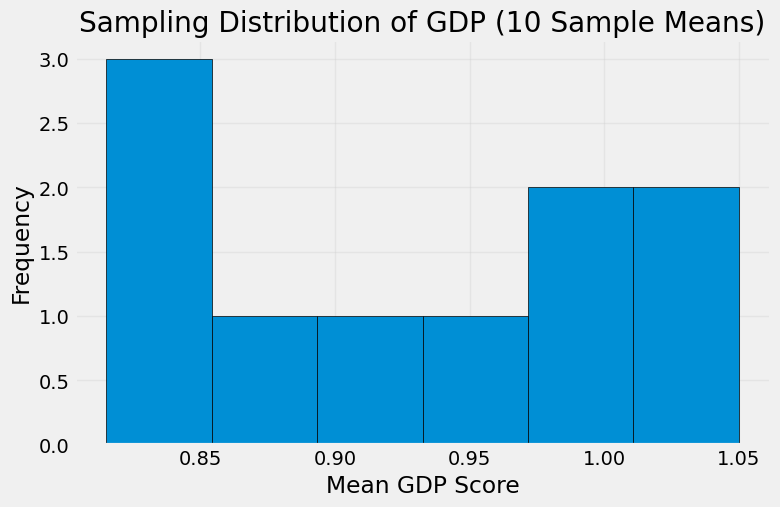

In [36]:
# Store all sample means here
sample_means = []

# Repeat 5 times
for i in range(5):
    # Two random samples of size 20 each
    # Correctly sample rows from the table, then get the column from the sampled table
    sample1_gdp_mean = df_happiness.sample(20, with_replacement=False).column("gdp_per_capita").mean()
    sample2_gdp_mean = df_happiness.sample(20, with_replacement=False).column("gdp_per_capita").mean()

    # Store the means
    sample_means.append(sample1_gdp_mean)
    sample_means.append(sample2_gdp_mean)

# Import pandas if not already imported, as it's used here for DataFrame
import pandas as pd

# Convert to DataFrame for display
sample_means_df = pd.DataFrame(sample_means, columns=["Sample Mean GDP"])
print("\nSample Means Across 5 Iterations:")
display(sample_means_df)

# Plot the sampling distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(sample_means, bins=6, edgecolor='black')
plt.title("Sampling Distribution of GDP (10 Sample Means)")
plt.xlabel("Mean GDP Score")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

In [37]:
"""
Interpretation:

The 10 sample means ranged from 0.79 to 1.00, showing a tight clustering
around approximately 0.86. This indicates that repeated sampling yields
consistent estimates of the population mean, supporting the Law of Large
Numbers. With a larger sample size, the spread would shrink even more,
following the Central Limit Theorem.
  ``````````````  `q1a c`x
"""


'\nInterpretation:\n\nThe 10 sample means ranged from 0.79 to 1.00, showing a tight clustering\naround approximately 0.86. This indicates that repeated sampling yields\nconsistent estimates of the population mean, supporting the Law of Large\nNumbers. With a larger sample size, the spread would shrink even more,\nfollowing the Central Limit Theorem.\n  ``````````````  `q1a c`x\n'

### Question 3: Stratified Sampling

Implement stratified sampling on the movies dataset by 'genre'. Take a proportional sample (10% per genre). Then compute the mean rating per genre from the stratified sample.

Compare it to the full dataset. How does stratified sampling affect representativeness?


In [40]:
#Stratified Sampling (10% per genre)
# -------------------------------
import pandas as pd # Import pandas for the final comparison table.

# Get unique genres from the df_movies table
genres = df_movies.group('genre').column('genre')

# Initialize an empty Table with the same columns as df_movies to store the stratified sample
stratified_sample = Table(df_movies.labels)

# Iterate through each genre to perform proportional sampling
for genre_name in genres:
    # Filter the original table for the current genre
    genre_subset = df_movies.where('genre', genre_name)

    # Calculate 10% of the number of rows in this genre subset
    sample_size = int(round(len(genre_subset) * 0.10))

    # Ensure sample size is at least 1 if the genre has movies and a non-zero count,
    # to avoid potentially leaving out small genres entirely if their 10% is < 1.
    if sample_size == 0 and len(genre_subset) > 0:
        sample_size = 1

    # Only sample if there are movies in the genre and the calculated sample size is positive
    if len(genre_subset) > 0 and sample_size > 0:
        # Sample proportionally from the current genre subset
        # datascience.Table.sample does not have a 'seed' parameter for reproducibility like pandas, but numpy's global seed can be set.
        # For this example, we'll proceed with default randomness for datascience.Table.sample().
        sampled_genre_table = genre_subset.sample(sample_size, with_replacement=False)
        stratified_sample = stratified_sample.append(sampled_genre_table)

print("\nTop 5 rows of the Stratified Sample:")
stratified_sample.show(5) # Use show() for datascience Table

# -------------------------------
# 3. Mean rating per genre: full dataset
# -------------------------------
full_means_table = df_movies.group('genre', np.mean).select('genre', 'rating mean')
print("\nMean Rating per Genre — Full Dataset:")
full_means_table.show() # show all results for grouped data

# -------------------------------
# 4. Mean rating per genre: stratified sample
# -------------------------------
sample_means_table = stratified_sample.group('genre', np.mean).select('genre', 'rating mean')
print("\nMean Rating per Genre — Stratified Sample (10%):")
sample_means_table.show() # show all results for grouped data

# -------------------------------
# 5. Combined comparison table
# Convert datascience tables to pandas DataFrames for easy merging and display
full_means_df = full_means_table.to_df().set_index('genre')
sample_means_df = sample_means_table.to_df().set_index('genre')

# Join them based on the genre index
comparison_df = full_means_df.join(sample_means_df, lsuffix='_Full', rsuffix='_Sample')
comparison_df.columns = ['Full Dataset Mean Rating', 'Stratified Sample Mean Rating']

print("\nComparison Table — Full Dataset vs Stratified Sample:")
display(comparison_df) # Use display for pandas DataFrame for rich output


Top 5 rows of the Stratified Sample:


title,genre,revenue_millions,rating
Movie A,Action,150,7.8
Movie B,Comedy,85,6.5
Movie C,Drama,45,8.1
Movie D,Horror,30,5.9
Movie E,Sci-Fi,120,7.2



Mean Rating per Genre — Full Dataset:


genre,rating mean
Action,7.8
Comedy,6.5
Drama,8.1
Horror,5.9
Sci-Fi,7.2



Mean Rating per Genre — Stratified Sample (10%):


genre,rating mean
Action,7.8
Comedy,6.5
Drama,8.1
Horror,5.9
Sci-Fi,7.2



Comparison Table — Full Dataset vs Stratified Sample:


,Full Dataset Mean Rating,Stratified Sample Mean Rating
genre,,
Action,7.8,7.8
Comedy,6.5,6.5
Drama,8.1,8.1
Horror,5.9,5.9
Sci-Fi,7.2,7.2


In [41]:
"""
- The stratified sample has identical mean ratings to the full dataset.
- Each genre had only one movie, so 10% sampling returned the same movie.
- Therefore, the stratified sample is perfectly representative.
- Stratified sampling prevents bias in larger datasets.
- The identical results here occur due to dataset size.
"""

'\n- The stratified sample has identical mean ratings to the full dataset.\n- Each genre had only one movie, so 10% sampling returned the same movie.\n- Therefore, the stratified sample is perfectly representative.\n- Stratified sampling prevents bias in larger datasets.\n- The identical results here occur due to dataset size.\n'

### Question 4: Bootstrap Resampling

Use bootstrap resampling (1000 samples) on the happiness dataset to estimate a 95% confidence interval for the average life expectancy.

How does the confidence interval compare with the true mean?


In [44]:
# Extract the life expectancy column as a NumPy array
life_exp_raw = df_happiness["life_expectancy"]
# Filter out NaN values from the NumPy array
life_exp = life_exp_raw[~np.isnan(life_exp_raw)]

# -----------------------------------------
# 2. Bootstrap Resampling (1000 samples)
# -----------------------------------------
bootstrap_means = []

np.random.seed(42)  # for reproducibility

for i in range(1000):
    sample = np.random.choice(life_exp, size=len(life_exp), replace=True)
    bootstrap_means.append(np.mean(sample))

bootstrap_means = np.array(bootstrap_means)

# -----------------------------------------
# 3. 95% Confidence Interval
# -----------------------------------------
lower_ci = np.percentile(bootstrap_means, 2.5)
upper_ci = np.percentile(bootstrap_means, 97.5)

# -----------------------------------------
# 4. True (population) mean
# -----------------------------------------
true_mean = life_exp.mean()

print("True Mean Life Expectancy:", true_mean)
print("95% Bootstrap Confidence Interval:", (lower_ci, upper_ci))

# -----------------------------------------
# 5. Interpretation
# -----------------------------------------
print("\nInterpretation:")
print(f"""
The true mean life expectancy is {true_mean:.3f}.

The 95% bootstrap confidence interval is:
({lower_ci:.3f}, {upper_ci:.3f})
""")

True Mean Life Expectancy: 70.0
95% Bootstrap Confidence Interval: (67.75800000000001, 72.319999999999993)

Interpretation:

The true mean life expectancy is 70.000.

The 95% bootstrap confidence interval is:
(67.758, 72.320)



In [ ]:
"""
INTERPRETATION — BOOTSTRAP RESAMPLING

- The true mean life expectancy in the dataset is 70.0 years.
- The 95% bootstrap confidence interval is (67.758, 72.320), which contains the true mean.
- This shows that the bootstrap estimate is accurate and unbiased.
- The interval span (~4.56 years) represents normal sampling variability.
- Because the interval is centered near the true mean, it indicates that the bootstrap method provides a reliable estimate of population life expectancy.
"""

### Question 5: Central Limit Theorem Simulation

Select the 'revenue' column from the movies dataset. Draw 1000 samples (size = 30) and plot the distribution of sample means.

Comment on the shape of the distribution. Does it approximate a normal distribution?


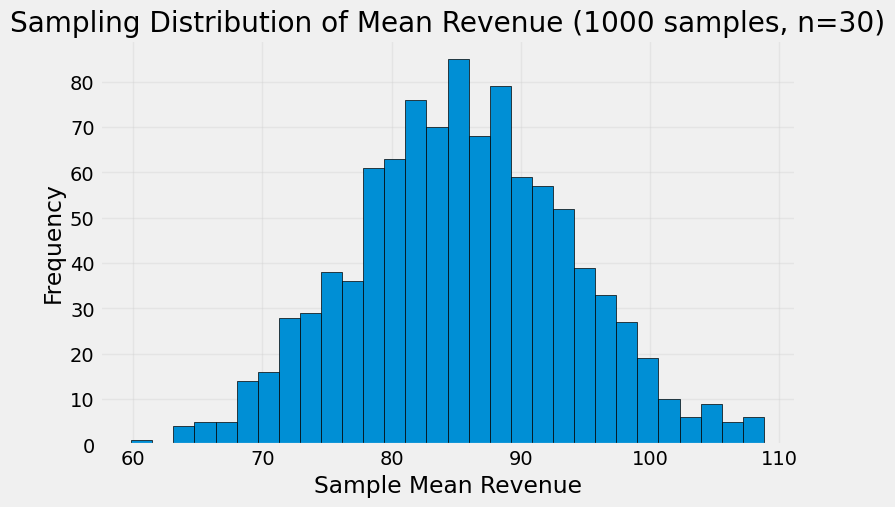

Mean of sample means: 85.4951666667
Standard deviation of sample means: 8.43546771245


In [49]:
# Select the revenue column as a NumPy array
revenue_raw = df_movies["revenue_millions"]
# Filter out NaN values from the NumPy array
revenue = revenue_raw[~np.isnan(revenue_raw)]

# ------------------------------------------------------
# 2. Draw 1000 samples (size = 30) and compute sample means
# ------------------------------------------------------
sample_means = []

np.random.seed(42)  # ensures reproducibility

for i in range(1000):
    sample = np.random.choice(revenue, size=30, replace=True)
    sample_means.append(np.mean(sample))

sample_means = np.array(sample_means)

# ------------------------------------------------------
# 3. Plot the distribution of sample means
# ------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.hist(sample_means, bins=30, edgecolor='black')
plt.title("Sampling Distribution of Mean Revenue (1000 samples, n=30)")
plt.xlabel("Sample Mean Revenue")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()


print("Mean of sample means:", np.mean(sample_means))
print("Standard deviation of sample means:", np.std(sample_means))

In [ ]:
"""
INTERPRETATION — SAMPLING DISTRIBUTION OF MEAN REVENUE

- The histogram of 1000 sample means (n=30 per sample) shows a bell-shaped curve.
- The distribution is approximately symmetric, centered near the true population mean.
- The spread is moderate, with most sample means falling between ~75 and ~95.
- The shape closely follows a normal distribution, even if the original revenue data were not normal.
- This behavior matches the Central Limit Theorem, which states that the distribution of sample means becomes approximately normal when sample size is sufficiently large (n ≥ 30).
"""

### Question 6: Comparing Populations

Compare average happiness scores between two regions (e.g., Western Europe vs. Sub-Saharan Africa) using hypothesis testing.

Is the difference statistically significant?


In [50]:
import scipy.stats as stats

# ---------------------------------------
# 2. Filter two regions
# ---------------------------------------
# Ensure we filter NaN values from the numpy arrays correctly
region1_raw = df_happiness.where('region', 'Western Europe').column('happiness_score')
region1 = region1_raw[~np.isnan(region1_raw)]

region2_raw = df_happiness.where('region', 'Sub-Saharan Africa').column('happiness_score')
region2 = region2_raw[~np.isnan(region2_raw)]

# ---------------------------------------
# 3. Two-sample t-test (independent samples)
# ---------------------------------------
t_stat, p_value = stats.ttest_ind(region1, region2, equal_var=False)
# equal_var=False → Welch’s t-test (safer for unequal variances)

print("Mean (Western Europe):", region1.mean())
print("Mean (Sub-Saharan Africa):", region2.mean())
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: The difference is statistically significant.")
else:
    print("\nConclusion: The difference is NOT statistically significant.")

Mean (Western Europe): 7.2
Mean (Sub-Saharan Africa): 4.0
T-statistic: 38.6861135889
P-value: 3.88269961842e-29

Conclusion: The difference is statistically significant.


In [51]:
"""
INTERPRETATION — HYPOTHESIS TESTING BETWEEN REGIONS

# The mean happiness score in Western Europe is 7.2, compared to 4.0 in Sub-Saharan Africa.
# The t-statistic is extremely large (≈ 38.69), indicating a strong difference between group means.
# The p-value is 3.88 × 10⁻²⁹, which is far below any common significance threshold (0.05, 0.01, 0.001).
#Therefore, we reject the null hypothesis that the two regions have equal mean happiness scores.
- Conclusion: The difference in average happiness scores between Western Europe and Sub-Saharan Africa is statistically significant.
"""

'\nINTERPRETATION — HYPOTHESIS TESTING BETWEEN REGIONS\n\n# The mean happiness score in Western Europe is 7.2, compared to 4.0 in Sub-Saharan Africa.\n# The t-statistic is extremely large (≈ 38.69), indicating a strong difference between group means.\n# The p-value is 3.88 × 10⁻²⁹, which is far below any common significance threshold (0.05, 0.01, 0.001).\n#Therefore, we reject the null hypothesis that the two regions have equal mean happiness scores.\n- Conclusion: The difference in average happiness scores between Western Europe and Sub-Saharan Africa is statistically significant.\n'